# The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100,random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

/var/folders/4j/ry7_scw962q90x2629f31m2m0000gn/T/ipykernel_85454/3835155737.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [2]:
y_pred

array([1])

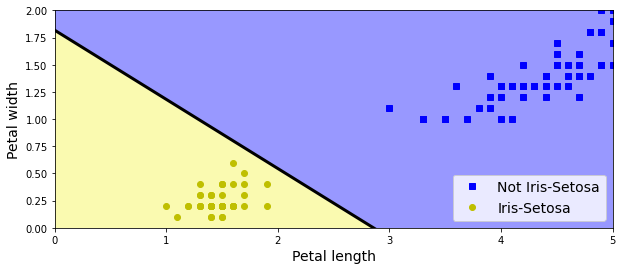

In [4]:
import matplotlib.pyplot as plt

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def derivative(f,z,eps=0.0000001):
    return (f(z+eps) - f(z-eps))/(2*eps)

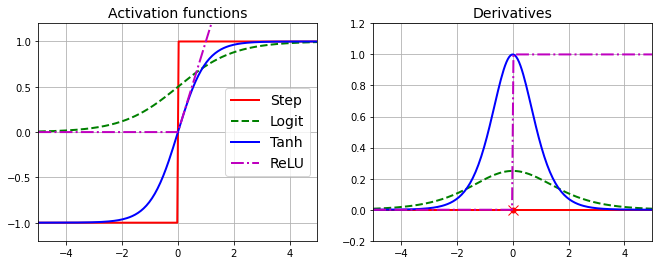

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

# Training an MLP with TensorFlow's High-Level

In [7]:
import tensorflow as tf

In [8]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [11]:
feature_cols = [tf.feature_column.numeric_column("X",shape=[28*28])]

dnn_clf = tf.estimator.DNNClassifier(
    hidden_units=[300,100],
    n_classes=10,
    feature_columns=feature_cols
)

input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X":X_train},
    y=y_train,num_epochs = 40,
    batch_size=50,
    shuffle = True
)

dnn_clf.train(input_fn = input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/4j/ry7_scw962q90x2629f31m2m0000gn/T/tmp92ilwz5a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Instructions for updating:
Use Vari

INFO:tensorflow:loss = 0.54187894, step = 4400 (0.210 sec)
INFO:tensorflow:global_step/sec: 493.712
INFO:tensorflow:loss = 0.51760733, step = 4500 (0.203 sec)
INFO:tensorflow:global_step/sec: 472.666
INFO:tensorflow:loss = 0.49141055, step = 4600 (0.212 sec)
INFO:tensorflow:global_step/sec: 467.804
INFO:tensorflow:loss = 0.5675973, step = 4700 (0.214 sec)
INFO:tensorflow:global_step/sec: 466.007
INFO:tensorflow:loss = 0.59700245, step = 4800 (0.215 sec)
INFO:tensorflow:global_step/sec: 492.951
INFO:tensorflow:loss = 0.34456712, step = 4900 (0.203 sec)
INFO:tensorflow:global_step/sec: 494.408
INFO:tensorflow:loss = 0.44494382, step = 5000 (0.202 sec)
INFO:tensorflow:global_step/sec: 470.763
INFO:tensorflow:loss = 0.6071829, step = 5100 (0.213 sec)
INFO:tensorflow:global_step/sec: 450.544
INFO:tensorflow:loss = 0.3419916, step = 5200 (0.222 sec)
INFO:tensorflow:global_step/sec: 448.22
INFO:tensorflow:loss = 0.24766573, step = 5300 (0.223 sec)
INFO:tensorflow:global_step/sec: 520.404
INFO

INFO:tensorflow:loss = 0.21756172, step = 12600 (0.204 sec)
INFO:tensorflow:global_step/sec: 495.784
INFO:tensorflow:loss = 0.12745246, step = 12700 (0.202 sec)
INFO:tensorflow:global_step/sec: 494.278
INFO:tensorflow:loss = 0.4012792, step = 12800 (0.202 sec)
INFO:tensorflow:global_step/sec: 480.985
INFO:tensorflow:loss = 0.21983247, step = 12900 (0.208 sec)
INFO:tensorflow:global_step/sec: 490.564
INFO:tensorflow:loss = 0.16718808, step = 13000 (0.204 sec)
INFO:tensorflow:global_step/sec: 472.445
INFO:tensorflow:loss = 0.34444577, step = 13100 (0.212 sec)
INFO:tensorflow:global_step/sec: 451.017
INFO:tensorflow:loss = 0.17379214, step = 13200 (0.221 sec)
INFO:tensorflow:global_step/sec: 451.337
INFO:tensorflow:loss = 0.3682276, step = 13300 (0.222 sec)
INFO:tensorflow:global_step/sec: 483.049
INFO:tensorflow:loss = 0.36191016, step = 13400 (0.207 sec)
INFO:tensorflow:global_step/sec: 488.167
INFO:tensorflow:loss = 0.38770226, step = 13500 (0.205 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 484.541
INFO:tensorflow:loss = 0.33860058, step = 20800 (0.206 sec)
INFO:tensorflow:global_step/sec: 451.056
INFO:tensorflow:loss = 0.1568864, step = 20900 (0.222 sec)
INFO:tensorflow:global_step/sec: 435.386
INFO:tensorflow:loss = 0.276622, step = 21000 (0.230 sec)
INFO:tensorflow:global_step/sec: 420.316
INFO:tensorflow:loss = 0.35577062, step = 21100 (0.238 sec)
INFO:tensorflow:global_step/sec: 463.407
INFO:tensorflow:loss = 0.29147533, step = 21200 (0.216 sec)
INFO:tensorflow:global_step/sec: 390.41
INFO:tensorflow:loss = 0.21237858, step = 21300 (0.257 sec)
INFO:tensorflow:global_step/sec: 411.819
INFO:tensorflow:loss = 0.104854204, step = 21400 (0.243 sec)
INFO:tensorflow:global_step/sec: 282.354
INFO:tensorflow:loss = 0.33742455, step = 21500 (0.355 sec)
INFO:tensorflow:global_step/sec: 248.957
INFO:tensorflow:loss = 0.28018916, step = 21600 (0.401 sec)
INFO:tensorflow:global_step/sec: 315.359
INFO:tensorflow:loss = 0.1971216, step = 21700 (0.318

INFO:tensorflow:loss = 0.20701045, step = 28900 (0.247 sec)
INFO:tensorflow:global_step/sec: 430.209
INFO:tensorflow:loss = 0.078372926, step = 29000 (0.233 sec)
INFO:tensorflow:global_step/sec: 268.886
INFO:tensorflow:loss = 0.054372348, step = 29100 (0.373 sec)
INFO:tensorflow:global_step/sec: 273.881
INFO:tensorflow:loss = 0.11559495, step = 29200 (0.366 sec)
INFO:tensorflow:global_step/sec: 291.323
INFO:tensorflow:loss = 0.4462426, step = 29300 (0.344 sec)
INFO:tensorflow:global_step/sec: 342.869
INFO:tensorflow:loss = 0.09555823, step = 29400 (0.290 sec)
INFO:tensorflow:global_step/sec: 397.406
INFO:tensorflow:loss = 0.12659694, step = 29500 (0.251 sec)
INFO:tensorflow:global_step/sec: 275.209
INFO:tensorflow:loss = 0.1650567, step = 29600 (0.366 sec)
INFO:tensorflow:global_step/sec: 276.519
INFO:tensorflow:loss = 0.14388263, step = 29700 (0.366 sec)
INFO:tensorflow:global_step/sec: 319.361
INFO:tensorflow:loss = 0.13941069, step = 29800 (0.306 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 300.784
INFO:tensorflow:loss = 0.15446347, step = 37100 (0.331 sec)
INFO:tensorflow:global_step/sec: 253.004
INFO:tensorflow:loss = 0.082582615, step = 37200 (0.397 sec)
INFO:tensorflow:global_step/sec: 216.866
INFO:tensorflow:loss = 0.20504808, step = 37300 (0.461 sec)
INFO:tensorflow:global_step/sec: 268.403
INFO:tensorflow:loss = 0.18319115, step = 37400 (0.371 sec)
INFO:tensorflow:global_step/sec: 339.846
INFO:tensorflow:loss = 0.09731896, step = 37500 (0.294 sec)
INFO:tensorflow:global_step/sec: 386.074
INFO:tensorflow:loss = 0.18581542, step = 37600 (0.259 sec)
INFO:tensorflow:global_step/sec: 360.363
INFO:tensorflow:loss = 0.31632447, step = 37700 (0.278 sec)
INFO:tensorflow:global_step/sec: 352.999
INFO:tensorflow:loss = 0.4927022, step = 37800 (0.283 sec)
INFO:tensorflow:global_step/sec: 374.145
INFO:tensorflow:loss = 0.098388806, step = 37900 (0.267 sec)
INFO:tensorflow:global_step/sec: 390.707
INFO:tensorflow:loss = 0.10049034, step = 38000 (

In [13]:
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-01-08T14:33:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/4j/ry7_scw962q90x2629f31m2m0000gn/T/tmp92ilwz5a/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.25942s
INFO:tensorflow:Finished evaluation at 2022-01-08-14:33:22
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9499, average_loss = 0.17952663, global_step = 44000, loss = 0.17837086
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /var/folders/4j/ry7_scw962q90x2629f31m2m0000gn/T/tmp92ilwz5a/model.ckpt-44000


In [15]:
eval_results

{'accuracy': 0.9499,
 'average_loss': 0.17952663,
 'loss': 0.17837086,
 'global_step': 44000}

In [16]:
y_pred_iter = dnn_clf.predict(input_fn = test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/4j/ry7_scw962q90x2629f31m2m0000gn/T/tmp92ilwz5a/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([-2.1742234, -6.827368 , -1.4360074,  1.0810521, -6.2467256,
        -2.6211529, -8.390314 ,  6.005675 , -3.5483544, -1.1718651],
       dtype=float32),
 'probabilities': array([2.7768858e-04, 2.6468131e-06, 5.8097986e-04, 7.1995654e-03,
        4.7303452e-06, 1.7760665e-04, 5.5455462e-07, 9.9092931e-01,
        7.0271693e-05, 7.5661810e-04], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

# Training a DNN Using Plain TensorFlow

In [17]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [18]:
tf.compat.v1.reset_default_graph()

In [21]:
tf.compat.v1.disable_eager_execution()

In [22]:
X = tf.compat.v1.placeholder(tf.float32, shape = (None, n_inputs), name='X')
y = tf.compat.v1.placeholder(tf.int32, shape =(None), name='y')

In [25]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.compat.v1.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name='kernel')
        b = tf.Variable(tf.zeros([n_neurons]), name='bias')
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [26]:
with tf.name_scope('dnn'):
    hidden1 = neuron_layer(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name = 'hidden2',activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name='outputs')

In [29]:

with tf.name_scope('dnn'):
    hidden1 = tf.compat.v1.contrib.layers.fully_connected(X, n_hidden1, scope = 'hidden1')
    hidden2 = tf.compat.v1.contrib.layers.fully_connected(hidden1, n_hidden2, scope = 'hidden2')
    logits = tf.compat.v1.contrib.layers.fully_connected(hidden2, n_outpus, scope='outputs',activation_fn=None)

AttributeError: module 'tensorflow.compat.v1' has no attribute 'contrib'